# Imports

In [116]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import scipy.stats as stats
import scikit_posthocs as sp

import utils # offload data processing into .py file

In [2]:
data_dir = 'C:/Users/Emily Jensen/OneDrive - UCB-O365/Drone Feedback Data/data/'

# data_dir = '/Users/emilyjensen/Library/CloudStorage/OneDrive-UCB-O365/Drone Feedback Data/data/'

Open all of the relevant data files/directories

Emily downloaded the final data and Qualtrics surveys on 4/16/24

Qualtrics export settings:

<img src="qualtrics_export_settings.png" alt="Qualtrics Export Settings" width="500px">

# Load Data

Notes on participants that seem to have restarted the experiment:
- `5bd49bcc25db7b0001794063` restarted after trial 1 - KEEP
- `5c90094e71f3100016181ea9` restarted after trial 3 and again after trial 1 - KEEP
- `5ef9f528c7ae587afa25fe9b` restarted after trial 6 - REMOVE
- `60fcc292d13ae9614d4a77a7` restarted after trial 3 - KEEP
- `6105c41aa4fe602501d5a8cc` restarted after trial 8 - REMOVE
- `610796f1301fccdca446af57` restarted after trial 7 - REMOVE
- `629658baad2881aba974c6c3` restarted after trial 2 - KEEP
- `63026a8fd8429b224cd2a134` restarted before completing trial 1 - KEEP
- `631f1b608af38f654d2a3b1f` restarted after trial 15 - REMOVE
- `637d4196c70a66e28ecede34` restarted before completing trial 1 - KEEP
- `6388b6c86e47b08e1eded1fd` restarted before completing trial 1 - KEEP
- `63ba10de73415d047e1d6731` restarted after trial 5 and again after trial 1 - REMOVE
- `643c6175d46d41e74033994f` restarted after trial 8 and again after trial 1 - REMOVE
- `652ab7948cb59f4c50c7972a` restarted after trial 1 - KEEP
- `6596a5cad60ef105b6c18897` restarted after trial 1 - KEEP
- `65cba99c92b362b45e414da7` restarted after trial 17 - REMOVE

We will keep the participants who complete less than 5 trials before completing a complete run.

Participant `6400dc9f84ed19aeedc1a2cc` seems to have filled out the qualtrics survey twice. The numerical data are the same and the free response questions have very similar content so I feel fine only keeping the first entry.

This has been implemented in `utils.load_data()`

Participants removed for not providing a good-faith effort:

- `63026a8fd8429b224cd2a134` 
- `637d4196c70a66e28ecede34` 
- `5f90581950d8520e8c7d3890`

These participants crashed on every trial and never used horizontal inputs

In [3]:
part_file, trial_file, ids = utils.load_data()

Dropped 17 duplicate IDs:
['5bd49bcc25db7b0001794063' '5c90094e71f3100016181ea9'
 '5ef9f528c7ae587afa25fe9b' '60fcc292d13ae9614d4a77a7'
 '6105c41aa4fe602501d5a8cc' '610796f1301fccdca446af57'
 '629658baad2881aba974c6c3' '63026a8fd8429b224cd2a134'
 '631f1b608af38f654d2a3b1f' '637d4196c70a66e28ecede34'
 '6388b6c86e47b08e1eded1fd' '63ba10de73415d047e1d6731'
 '6400dc9f84ed19aeedc1a2cc' '643c6175d46d41e74033994f'
 '652ab7948cb59f4c50c7972a' '6596a5cad60ef105b6c18897'
 '65cba99c92b362b45e414da7']
Final number of IDs in participant file: 137
Final number of IDs in trial file: 137


# Basic stats

This is after filtering out participants that restarted the experiment

In [4]:
utils.run_basic_stats(part_file)

           count  proportion
condition                   
full          46        0.34
score         45        0.33
text          46        0.34
            count  proportion
gender                       
Man            59        0.43
Non-binary      7        0.05
Woman          71        0.52
                  count  proportion
drone_experience                   
None                112        0.82
Some                 20        0.15
Regularly             5        0.04
Professional          0        0.00
                       count  proportion
video_game_experience                   
None                      24        0.18
Monthly                   38        0.28
Weekly                    35        0.26
Daily                     40        0.29
                   count  proportion
feedback_helped                     
Strongly Disagree     22        0.16
Disagree              17        0.12
Neutral               22        0.16
Agree                 59        0.43
Strongly Agree       

In [5]:
trial_file['trial_time_seconds'].describe()

count    2740.000000
mean       29.731975
std        33.842287
min        -0.000072
25%        16.610697
50%        24.607244
75%        36.634225
max      1072.321791
Name: trial_time_seconds, dtype: float64

<Axes: >

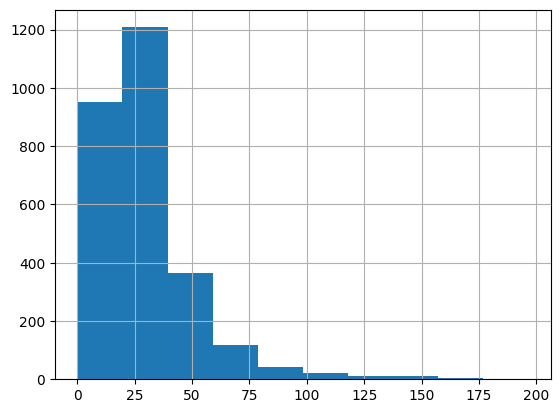

In [6]:
trial_file.loc[(trial_file['trial_time_seconds'] < 200), 'trial_time_seconds'].hist()

In [7]:
len(trial_file[trial_file['trial_time_seconds'] < 120])/ len(trial_file)

0.9883211678832117

In [9]:
# select participants with 'Regularly' and 'Professional' drone experience
part_file[part_file['drone_experience'].isin(['Regularly', 'Professional'])]['n_safe_landings']

19     14
37     12
64     14
70     15
152     6
Name: n_safe_landings, dtype: int64

# Research Themes

## Perception of Feedback

### What is associated with overall feedback helpfulness rating?

In [10]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings'] + [f'mode_{q}_code' for q in ['motivation', 'manageable', 'actionable', 'timely', 'reflection']]

dep_var = 'feedback_helped'
utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.141789
         Iterations: 65
         Function evaluations: 71
         Gradient evaluations: 71
                             OrderedModel Results                             
Dep. Variable:        feedback_helped   Log-Likelihood:                -156.43
Model:                   OrderedModel   AIC:                             350.9
Method:            Maximum Likelihood   BIC:                             406.3
Date:                Wed, 01 May 2024                                         
Time:                        11:20:41                                         
No. Observations:                 137                                         
Df Residuals:                     118                                         
Df Model:                          15                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [11]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings'] + [f'mode_{q}_code' for q in ['motivation_collapsed', 'manageable_collapsed', 'actionable_collapsed', 'timely_collapsed', 'reflection_collapsed']]

dep_var = 'feedback_helped_collapsed'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.702745
         Iterations: 70
         Function evaluations: 77
         Gradient evaluations: 77
                                 OrderedModel Results                                
Dep. Variable:     feedback_helped_collapsed   Log-Likelihood:                -96.276
Model:                          OrderedModel   AIC:                             226.6
Method:                   Maximum Likelihood   BIC:                             276.2
Date:                       Wed, 01 May 2024                                         
Time:                               11:22:14                                         
No. Observations:                        137                                         
Df Residuals:                            120                                         
Df Model:                                 15                                         
                                     coef    std err  

### What is associated with overall rating for each dimension?

In [12]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_motivation_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.373718
         Iterations: 46
         Function evaluations: 51
         Gradient evaluations: 51
                              OrderedModel Results                              
Dep. Variable:     mode_motivation_code   Log-Likelihood:                -188.20
Model:                     OrderedModel   AIC:                             404.4
Method:              Maximum Likelihood   BIC:                             445.3
Date:                  Wed, 01 May 2024                                         
Time:                          11:24:43                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [13]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_motivation_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.914227
         Iterations: 45
         Function evaluations: 50
         Gradient evaluations: 50
                                   OrderedModel Results                                   
Dep. Variable:     mode_motivation_collapsed_code   Log-Likelihood:                -125.25
Model:                               OrderedModel   AIC:                             274.5
Method:                        Maximum Likelihood   BIC:                             309.5
Date:                            Wed, 01 May 2024                                         
Time:                                    11:25:26                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

In [14]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_manageable_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.155081
         Iterations: 48
         Function evaluations: 54
         Gradient evaluations: 54
                              OrderedModel Results                              
Dep. Variable:     mode_manageable_code   Log-Likelihood:                -158.25
Model:                     OrderedModel   AIC:                             344.5
Method:              Maximum Likelihood   BIC:                             385.4
Date:                  Wed, 01 May 2024                                         
Time:                          11:25:46                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [15]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_manageable_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.939331
         Iterations: 41
         Function evaluations: 47
         Gradient evaluations: 47
                                   OrderedModel Results                                   
Dep. Variable:     mode_manageable_collapsed_code   Log-Likelihood:                -128.69
Model:                               OrderedModel   AIC:                             281.4
Method:                        Maximum Likelihood   BIC:                             316.4
Date:                            Wed, 01 May 2024                                         
Time:                                    11:26:32                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

In [16]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_timely_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.926873
         Iterations: 50
         Function evaluations: 57
         Gradient evaluations: 57
                             OrderedModel Results                             
Dep. Variable:       mode_timely_code   Log-Likelihood:                -126.98
Model:                   OrderedModel   AIC:                             282.0
Method:            Maximum Likelihood   BIC:                             322.8
Date:                Wed, 01 May 2024                                         
Time:                        11:27:40                                         
No. Observations:                 137                                         
Df Residuals:                     123                                         
Df Model:                          10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [17]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_timely_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.718819
         Iterations: 43
         Function evaluations: 48
         Gradient evaluations: 48
                                 OrderedModel Results                                 
Dep. Variable:     mode_timely_collapsed_code   Log-Likelihood:                -98.478
Model:                           OrderedModel   AIC:                             221.0
Method:                    Maximum Likelihood   BIC:                             256.0
Date:                        Wed, 01 May 2024                                         
Time:                                11:28:41                                         
No. Observations:                         137                                         
Df Residuals:                             125                                         
Df Model:                                  10                                         
                                 coef    std 

In [18]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_reflection_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.298906
         Iterations: 46
         Function evaluations: 53
         Gradient evaluations: 53
                              OrderedModel Results                              
Dep. Variable:     mode_reflection_code   Log-Likelihood:                -177.95
Model:                     OrderedModel   AIC:                             383.9
Method:              Maximum Likelihood   BIC:                             424.8
Date:                  Wed, 01 May 2024                                         
Time:                          11:29:20                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [19]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_reflection_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.798554
         Iterations: 45
         Function evaluations: 53
         Gradient evaluations: 53
                                   OrderedModel Results                                   
Dep. Variable:     mode_reflection_collapsed_code   Log-Likelihood:                -109.40
Model:                               OrderedModel   AIC:                             242.8
Method:                        Maximum Likelihood   BIC:                             277.8
Date:                            Wed, 01 May 2024                                         
Time:                                    11:29:53                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

In [20]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_actionable_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 1.437505
         Iterations: 44
         Function evaluations: 52
         Gradient evaluations: 52
                              OrderedModel Results                              
Dep. Variable:     mode_actionable_code   Log-Likelihood:                -196.94
Model:                     OrderedModel   AIC:                             421.9
Method:              Maximum Likelihood   BIC:                             462.8
Date:                  Wed, 01 May 2024                                         
Time:                          11:30:26                                         
No. Observations:                   137                                         
Df Residuals:                       123                                         
Df Model:                            10                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----

In [21]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'condition_code', 'n_safe_landings']

dep_var = 'mode_actionable_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.973049
         Iterations: 41
         Function evaluations: 47
         Gradient evaluations: 47
                                   OrderedModel Results                                   
Dep. Variable:     mode_actionable_collapsed_code   Log-Likelihood:                -133.31
Model:                               OrderedModel   AIC:                             290.6
Method:                        Maximum Likelihood   BIC:                             325.7
Date:                            Wed, 01 May 2024                                         
Time:                                    11:31:15                                         
No. Observations:                             137                                         
Df Residuals:                                 125                                         
Df Model:                                      10                                         
         

### What is associated with trial rating for each dimension?

In [22]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'motivation'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.462092
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:             motivation   Log-Likelihood:                -4006.1
Model:                   OrderedModel   AIC:                             8030.
Method:            Maximum Likelihood   BIC:                             8084.
Date:                Wed, 01 May 2024                                         
Time:                        11:32:29                                         
No. Observations:                2740                                         
Df Residuals:                    2731                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [23]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'motivation_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.974755
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
                              OrderedModel Results                              
Dep. Variable:     motivation_collapsed   Log-Likelihood:                -2670.8
Model:                     OrderedModel   AIC:                             5356.
Method:              Maximum Likelihood   BIC:                             5397.
Date:                  Wed, 01 May 2024                                         
Time:                          11:34:03                                         
No. Observations:                  2740                                         
Df Residuals:                      2733                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [24]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'manageable'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.274264
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:             manageable   Log-Likelihood:                -3491.5
Model:                   OrderedModel   AIC:                             7001.
Method:            Maximum Likelihood   BIC:                             7054.
Date:                Wed, 01 May 2024                                         
Time:                        11:35:31                                         
No. Observations:                2740                                         
Df Residuals:                    2731                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [25]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'manageable_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.990022
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
                              OrderedModel Results                              
Dep. Variable:     manageable_collapsed   Log-Likelihood:                -2712.7
Model:                     OrderedModel   AIC:                             5439.
Method:              Maximum Likelihood   BIC:                             5481.
Date:                  Wed, 01 May 2024                                         
Time:                          11:37:51                                         
No. Observations:                  2740                                         
Df Residuals:                      2733                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [26]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'timely'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.032956
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35
                             OrderedModel Results                             
Dep. Variable:                 timely   Log-Likelihood:                -2830.3
Model:                   OrderedModel   AIC:                             5679.
Method:            Maximum Likelihood   BIC:                             5732.
Date:                Wed, 01 May 2024                                         
Time:                        11:38:33                                         
No. Observations:                2740                                         
Df Residuals:                    2731                                         
Df Model:                           5                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------

In [27]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'timely_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.799492
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:       timely_collapsed   Log-Likelihood:                -2190.6
Model:                   OrderedModel   AIC:                             4395.
Method:            Maximum Likelihood   BIC:                             4437.
Date:                Wed, 01 May 2024                                         
Time:                        11:40:13                                         
No. Observations:                2740                                         
Df Residuals:                    2733                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [28]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'reflection'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.455330
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
                             OrderedModel Results                             
Dep. Variable:             reflection   Log-Likelihood:                -3987.6
Model:                   OrderedModel   AIC:                             7993.
Method:            Maximum Likelihood   BIC:                             8046.
Date:                Wed, 01 May 2024                                         
Time:                        11:41:08                                         
No. Observations:                2740                                         
Df Residuals:                    2731                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [29]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'reflection_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.939224
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25
                              OrderedModel Results                              
Dep. Variable:     reflection_collapsed   Log-Likelihood:                -2573.5
Model:                     OrderedModel   AIC:                             5161.
Method:              Maximum Likelihood   BIC:                             5202.
Date:                  Wed, 01 May 2024                                         
Time:                          11:42:25                                         
No. Observations:                  2740                                         
Df Residuals:                      2733                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [30]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'actionable'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.498881
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29
                             OrderedModel Results                             
Dep. Variable:             actionable   Log-Likelihood:                -4106.9
Model:                   OrderedModel   AIC:                             8232.
Method:            Maximum Likelihood   BIC:                             8285.
Date:                Wed, 01 May 2024                                         
Time:                        11:44:03                                         
No. Observations:                2740                                         
Df Residuals:                    2731                                         
Df Model:                           5                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [31]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 'trial', 'outcome_code', 'condition_code']

dep_var = 'actionable_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.018012
         Iterations: 21
         Function evaluations: 26
         Gradient evaluations: 26
                              OrderedModel Results                              
Dep. Variable:     actionable_collapsed   Log-Likelihood:                -2789.4
Model:                     OrderedModel   AIC:                             5593.
Method:              Maximum Likelihood   BIC:                             5634.
Date:                  Wed, 01 May 2024                                         
Time:                          11:44:53                                         
No. Observations:                  2740                                         
Df Residuals:                      2733                                         
Df Model:                             5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

### Distributions of dimensional ratings across groups

**MOTIVATION**

In [32]:
utils.run_kruskal('mode_motivation_code', part_file)

mode_motivation_code     0     1     2     3     4
condition                                         
full                  0.04  0.09  0.28  0.41  0.17
score                 0.02  0.13  0.29  0.33  0.22
text                  0.13  0.04  0.17  0.43  0.22
KruskalResult(statistic=0.1463963278630341, pvalue=0.9294166349215891)


In [33]:
utils.run_kruskal('mode_motivation_collapsed_code', part_file)

mode_motivation_collapsed_code     0     1     2
condition                                       
full                            0.17  0.24  0.59
score                           0.16  0.29  0.56
text                            0.17  0.17  0.65
KruskalResult(statistic=0.5094110183965355, pvalue=0.7751447373473915)


**MANAGEABLE**

In [34]:
utils.run_kruskal('mode_manageable_code', part_file)

mode_manageable_code     0     1     2     3     4
condition                                         
full                  0.02  0.09  0.63  0.15  0.11
score                 0.07  0.22  0.60  0.04  0.07
text                  0.07  0.04  0.59  0.20  0.11
KruskalResult(statistic=8.5469918210492, pvalue=0.01393298942940031)
           full     score      text
full   1.000000  0.047528  1.000000
score  0.047528  1.000000  0.024559
text   1.000000  0.024559  1.000000


In [35]:
utils.run_kruskal('mode_manageable_collapsed_code', part_file)

mode_manageable_collapsed_code     0     1     2
condition                                       
full                            0.11  0.57  0.33
score                           0.31  0.60  0.09
text                            0.11  0.54  0.35
KruskalResult(statistic=14.348114574947575, pvalue=0.0007662076913257851)
           full     score      text
full   1.000000  0.004117  1.000000
score  0.004117  1.000000  0.002287
text   1.000000  0.002287  1.000000


**ACTIONABLE**

In [36]:
utils.run_kruskal('mode_actionable_code', part_file)

mode_actionable_code     0     1     2     3     4
condition                                         
full                  0.02  0.09  0.24  0.52  0.13
score                 0.16  0.27  0.29  0.16  0.13
text                  0.07  0.09  0.15  0.50  0.20
KruskalResult(statistic=14.91318951191215, pvalue=0.0005776197625926082)
           full     score      text
full   1.000000  0.004388  1.000000
score  0.004388  1.000000  0.001414
text   1.000000  0.001414  1.000000


In [37]:
utils.run_kruskal('mode_actionable_collapsed_code', part_file)

mode_actionable_collapsed_code     0     1     2
condition                                       
full                            0.13  0.22  0.65
score                           0.40  0.29  0.31
text                            0.17  0.15  0.67
KruskalResult(statistic=16.15022994037241, pvalue=0.00031118748860296607)
           full     score      text
full   1.000000  0.001394  1.000000
score  0.001394  1.000000  0.001545
text   1.000000  0.001545  1.000000


**TIMELY**

In [38]:
utils.run_kruskal('mode_timely_code', part_file)

mode_timely_code     0     1     2     3     4
condition                                     
full              0.00  0.00  0.74  0.13  0.13
score             0.02  0.07  0.64  0.18  0.09
text              0.02  0.00  0.61  0.17  0.20
KruskalResult(statistic=2.5897813753657135, pvalue=0.2739278063781436)


In [39]:
utils.run_kruskal('mode_timely_collapsed_code', part_file)

mode_timely_collapsed_code     0     1     2
condition                                   
full                        0.02  0.72  0.26
score                       0.09  0.64  0.27
text                        0.02  0.59  0.39
KruskalResult(statistic=2.9089328827839984, pvalue=0.23352492990309748)


**REFLECTION**

In [40]:
utils.run_kruskal('mode_reflection_code', part_file)

mode_reflection_code     0     1     2     3     4
condition                                         
full                  0.04  0.04  0.22  0.46  0.24
score                 0.09  0.11  0.18  0.40  0.22
text                  0.07  0.07  0.22  0.43  0.22
KruskalResult(statistic=0.6951396880264286, pvalue=0.7064026742088294)


In [41]:
utils.run_kruskal('mode_reflection_collapsed_code', part_file)

mode_reflection_collapsed_code     0     1     2
condition                                       
full                            0.13  0.20  0.67
score                           0.22  0.16  0.62
text                            0.13  0.20  0.67
KruskalResult(statistic=0.7144449998691459, pvalue=0.6996168157199105)


### Did they think the feedback helped?

In [42]:
utils.run_kruskal('feedback_helped_code', part_file)

feedback_helped_code     0     1     2     3     4
condition                                         
full                  0.09  0.13  0.22  0.43  0.13
score                 0.22  0.16  0.20  0.31  0.11
text                  0.17  0.09  0.07  0.54  0.13
KruskalResult(statistic=3.7471395176659312, pvalue=0.15357445835716177)


In [43]:
utils.run_kruskal('feedback_helped_collapsed_code', part_file)

feedback_helped_collapsed_code     0     1     2
condition                                       
full                            0.22  0.22  0.57
score                           0.38  0.20  0.42
text                            0.26  0.07  0.67
KruskalResult(statistic=4.9103711719278245, pvalue=0.08584726191584136)


## Evolution of Performance

For each condition, plot out the success of the trial for each participant

skipping participant 6522a86994a5ce0d7bb9feba trial 9


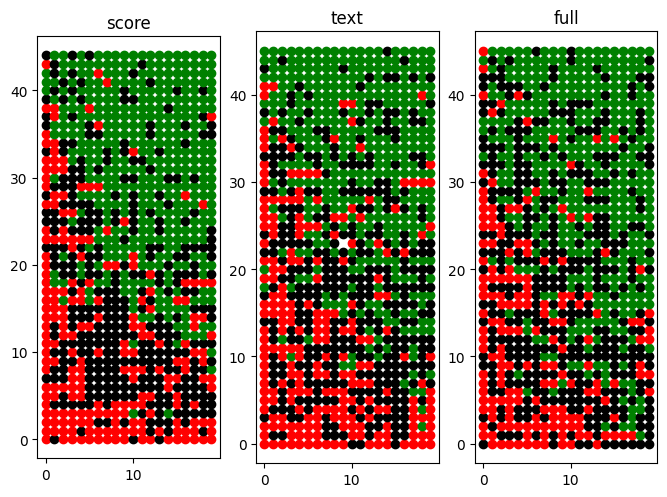

In [44]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    overall_scores = []

    # for each participant in that condition
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # score for that participant
        data['outcome_sore'] = 0
        data.loc[data['outcome'] == 'Unsafe', 'outcome_score'] = 3
        data.loc[data['outcome'] == 'Crash', 'outcome_score'] = 5

        total_score = data['outcome_score'].sum()
        overall_scores.append((i, part, total_score))

    # sort participants for this condition
    sorted_participants = sorted(overall_scores, key=lambda x: x[2], reverse=True)

    # plot all participants in sorted order
    for sorted_index, (_, part, _) in enumerate(sorted_participants):
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # plot all trials for that participant
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome == 'Safe':
                    axs[a].plot(trial, sorted_index, 'go')
                elif outcome == 'Unsafe':
                    axs[a].plot(trial, sorted_index, 'ko')
                else:
                    axs[a].plot(trial, sorted_index, 'ro')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

In [45]:
part_file.groupby('condition')['n_safe_landings'].sum()

condition
full     368
score    374
text     354
Name: n_safe_landings, dtype: int64

In [46]:
part_file.groupby('condition')['n_unsafe_landings'].sum()

condition
full     380
score    317
text     345
Name: n_unsafe_landings, dtype: int64

In [47]:
part_file.groupby('condition')['n_crashes'].sum()

condition
full     172
score    209
text     221
Name: n_crashes, dtype: int64

- Number of people who failed all the trials? difference between baseline and full conditions
- When did they first get 3 successes in a row? parallels to mastery heuristics
- What kinds of mistakes are people making?

Dig into robustness/learning curve stuff after doing the above questions

In [48]:
part_file['any_safe_landings'] = part_file['n_safe_landings'] > 0
part_file['3_safe_landings'] = part_file['n_safe_landings'] >= 3

In [49]:
print(part_file.groupby('condition')['any_safe_landings'].value_counts().unstack())
print(part_file.groupby('condition')['3_safe_landings'].value_counts().unstack())

any_safe_landings  False  True 
condition                      
full                   1     45
score                  8     37
text                   4     42
3_safe_landings  False  True 
condition                    
full                 6     40
score               12     33
text                10     36


In [50]:
c_table = part_file.groupby('condition')['any_safe_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    oddsratio, p_value = stats.fisher_exact(table)
    p_values.append(p_value)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.015187307563778372, 0.3610322262007656, 0.23052995536170712]
Significant results: [True, False, False]


In [51]:
c_table = part_file.groupby('condition')['3_safe_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.chi2_contingency(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.17132894795244324, 0.40926974331915433, 0.7610881571468915]
Significant results: [False, False, False]


In [52]:
# calculate which trial they first achieved three successes in a row
part_file['three_in_a_row_idx'] = 0
n_trials = 20
for i in range(len(part_file)):
    part = part_file.iloc[i]
    data = pd.read_csv(data_dir + part['prolific_id'] + '/survey_responses.csv')
    for trial in range(n_trials-2):
        try:
            if (data['outcome'].iloc[trial] == 'Safe') & (data['outcome'].iloc[trial+1] == 'Safe') & (data['outcome'].iloc[trial+2] == 'Safe'):
                part_file.loc[part_file['prolific_id'] == part['prolific_id'], 'three_in_a_row_idx'] = trial + 1
                break
        except:
            print(f"skipping participant {part['prolific_id']} trial {trial}")

skipping participant 6522a86994a5ce0d7bb9feba trial 17


In [ ]:
part_file[['prolific_id', 'three_in_a_row_idx']].head(10)

In [53]:
part_file['five_in_a_row_idx'] = 0
n_trials = 20
for i in range(len(part_file)):
    part = part_file.iloc[i]
    data = pd.read_csv(data_dir + part['prolific_id'] + '/survey_responses.csv')
    for trial in range(n_trials-4):
        try:
            if (data['outcome'].iloc[trial] == 'Safe') & (data['outcome'].iloc[trial+1] == 'Safe') & (data['outcome'].iloc[trial+2] == 'Safe') & (data['outcome'].iloc[trial+3] == 'Safe') & (data['outcome'].iloc[trial+4] == 'Safe'):
                part_file.loc[part_file['prolific_id'] == part['prolific_id'], 'five_in_a_row_idx'] = trial + 1
                break
        except:
            print(f"skipping participant {part['prolific_id']} trial {trial}")

skipping participant 6522a86994a5ce0d7bb9feba trial 15


In [54]:
part_file['reached_mastery_3'] = part_file['three_in_a_row_idx'] > 0
part_file['reached_mastery_5'] = part_file['five_in_a_row_idx'] > 0

print(part_file.groupby('condition')['reached_mastery_3'].value_counts().unstack())
print(part_file.groupby('condition')['reached_mastery_5'].value_counts().unstack())

reached_mastery_3  False  True 
condition                      
full                  17     29
score                 16     29
text                  21     25
reached_mastery_5  False  True 
condition                      
full                  31     15
score                 27     18
text                  30     16


In [55]:
len(part_file[part_file['reached_mastery_3'] == True])

83

In [56]:
c_table = part_file.groupby('condition')['reached_mastery_3'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [1.0, 0.5255688467805519, 0.39522767071234843]
Significant results: [False, False, False]


In [57]:
c_table = part_file.groupby('condition')['reached_mastery_5'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.517322927130677, 1.0, 0.6678827480256951]
Significant results: [False, False, False]


In [58]:
print(part_file[part_file['three_in_a_row_idx'] > 0].groupby('condition')['three_in_a_row_idx'].mean())
print(part_file[part_file['five_in_a_row_idx'] > 0].groupby('condition')['five_in_a_row_idx'].mean())

condition
full     9.241379
score    8.517241
text     8.200000
Name: three_in_a_row_idx, dtype: float64
condition
full     8.333333
score    9.111111
text     7.187500
Name: five_in_a_row_idx, dtype: float64


In [59]:
reached_mastery = part_file[part_file['three_in_a_row_idx'] > 0]
print(f"N reached mastery: {len(reached_mastery)}")
print("Average index of reaching mastery:")
print(reached_mastery.groupby('condition')['three_in_a_row_idx'].mean().round(2))

N reached mastery: 83
Average index of reaching mastery:
condition
full     9.24
score    8.52
text     8.20
Name: three_in_a_row_idx, dtype: float64


In [60]:
data_score = reached_mastery.loc[reached_mastery['condition'] == 'score', 'three_in_a_row_idx']
data_text = reached_mastery.loc[reached_mastery['condition'] == 'text', 'three_in_a_row_idx']
data_full = reached_mastery.loc[reached_mastery['condition'] == 'full', 'three_in_a_row_idx']
print(f"N participants for ANOVA: {len(data_score) + len(data_text) + len(data_full)}")
print("Mean (SD) index for each group:")
print(f"score: {data_score.mean()} ({data_score.std()})")
print(f"text: {data_text.mean()} ({data_text.std()})")
print(f"full: {data_full.mean()} ({data_full.std()})")

N participants for ANOVA: 83
Mean (SD) index for each group:
score: 8.517241379310345 (4.725468152583799)
text: 8.2 (5.5901699437494745)
full: 9.241379310344827 (4.8745342078851355)


In [61]:
stats.f_oneway(data_score, data_text, data_full)

F_onewayResult(statistic=0.3070766233787386, pvalue=0.7364573743489766)

In [62]:
utils.run_kruskal('three_in_a_row_idx', part_file[part_file['three_in_a_row_idx'] > 0])

three_in_a_row_idx    1     2     3     4     5     6     7     8     9   \
condition                                                                  
full                0.03  0.07  0.00  0.14  0.07  0.00  0.10  0.00  0.03   
score               0.00  0.07  0.07  0.03  0.14  0.07  0.10  0.17  0.03   
text                0.12  0.04  0.04  0.12  0.04  0.12  0.08  0.08  0.04   

three_in_a_row_idx    10    11    12    13    14    15    16    17    18  
condition                                                                 
full                0.10  0.17  0.03  0.00  0.07  0.03  0.07  0.03  0.03  
score               0.03  0.00  0.03  0.03  0.07  0.03  0.00  0.03  0.07  
text                0.00  0.00  0.04  0.04  0.04  0.04  0.04  0.04  0.08  
KruskalResult(statistic=0.8359763583772802, pvalue=0.6583700108465329)


In [63]:
utils.run_anova('three_in_a_row_idx', part_file[part_file['three_in_a_row_idx'] > 0])

F_onewayResult(statistic=0.3070766233787385, pvalue=0.7364573743489766)


In [64]:
utils.run_kruskal('five_in_a_row_idx', part_file[part_file['five_in_a_row_idx'] > 0])

five_in_a_row_idx    1     2     3     4     5     6     7     8     9     10  \
condition                                                                       
full               0.00  0.07  0.00  0.27  0.07  0.00  0.13  0.00  0.07  0.07   
score              0.00  0.00  0.06  0.00  0.17  0.00  0.11  0.28  0.00  0.00   
text               0.12  0.06  0.00  0.12  0.06  0.12  0.06  0.06  0.12  0.00   

five_in_a_row_idx    11    12    13    14    15    16  
condition                                              
full               0.07  0.07  0.00  0.07  0.00  0.13  
score              0.06  0.11  0.06  0.06  0.11  0.00  
text               0.00  0.06  0.12  0.00  0.06  0.00  
KruskalResult(statistic=1.7639930805329855, pvalue=0.4139556070448809)


In [65]:
part_file['achieved_mastery_3'] = part_file['three_in_a_row_idx'] > 0
part_file.groupby('condition')['achieved_mastery_3'].value_counts().unstack()

achieved_mastery_3,False,True
condition,,
full,17,29
score,16,29
text,21,25


In [66]:
c_table = part_file.groupby('condition')['achieved_mastery_3'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [1.0, 0.5255688467805519, 0.39522767071234843]
Significant results: [False, False, False]


In [67]:
part_file['achieved_mastery_5'] = part_file['five_in_a_row_idx'] > 0
c_table = part_file.groupby('condition')['achieved_mastery_5'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.517322927130677, 1.0, 0.6678827480256951]
Significant results: [False, False, False]


In [68]:
# label each unsafe trial with which mistake they are making
trial_file['mistake'] = ''
for part in part_file['prolific_id']:
    data = pd.read_csv(data_dir + part + '/survey_responses.csv')
    for trial in data['trial']:
        if data.loc[data['trial'] == trial, 'outcome'].values[0] == 'Unsafe':
            # read in robusness file
            robustness = pd.read_csv(data_dir + part + f'/trial_{trial}/robustness.csv')
            reasons = ""
            if robustness.iloc[-1]['landing_speed'] < 0:
                reasons += "landing_speed "
            if robustness.iloc[-1]['landing_angle'] < 0:
                reasons += "landing_angle "
            elif (robustness.iloc[-1]['landing_angle'] > 0) & (robustness.iloc[-1]['landing_speed'] > 0):
                reasons += "something else "
            trial_file.loc[(trial_file['prolific_id'] == part) & (trial_file['trial'] == trial), 'mistake'] = reasons

In [69]:
trial_file['mistake'].value_counts()

mistake
                                1698
landing_speed landing_angle      405
landing_speed                    341
landing_angle                    198
something else                    98
Name: count, dtype: int64

In [70]:
trial_file.groupby(['condition', 'mistake'])['trial'].count().unstack().drop(columns=[''])

mistake,landing_angle,landing_speed,landing_speed landing_angle,something else
condition,,,,
score,51,111,129,26
text,73,107,135,30
full,74,123,141,42


In [71]:
trial_file.groupby(['condition', 'mistake'])['trial'].mean().unstack().drop(columns=['']).round(2)

mistake,landing_angle,landing_speed,landing_speed landing_angle,something else
condition,,,,
score,9.98,10.84,8.89,12.46
text,10.81,11.70,9.24,13.30
full,11.92,10.36,8.87,11.14


In [ ]:
trial_file[trial_file['mistake'] == 'something else ']

From manual inspection, it looks like the "something else" instances are edge cases where the drone lands right on the edge of the landing pad. it is technically in bounds by my measures, but may have been counted as out of bounds by the javascript simulation. Should we leave as is?

skipping participant 6522a86994a5ce0d7bb9feba trial 9


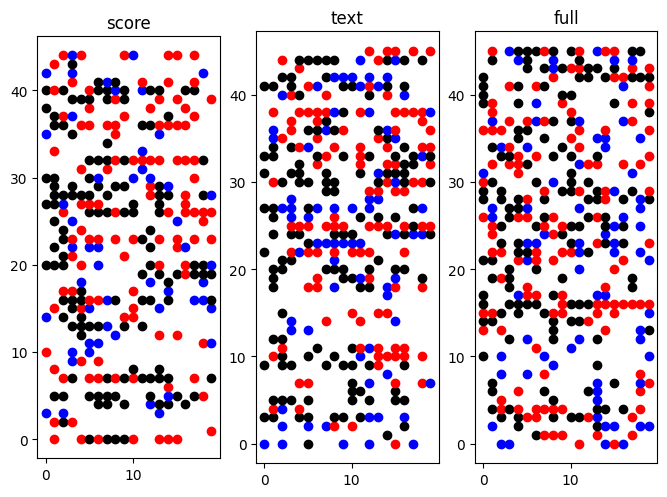

In [72]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

for a in range(len(axs)):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        for trial in range(n_trials):
            try:
                reason = trial_file[(trial_file['prolific_id'] == part) & (trial_file['trial'] == trial+1)]['mistake'].values[0]
                if 'speed' in reason and 'angle' not in reason:
                    axs[a].plot(trial, i, 'ro')
                elif 'angle' in reason and 'speed' not in reason:
                    axs[a].plot(trial, i, 'bo')
                elif 'angle' in reason and 'speed' in reason:
                    axs[a].plot(trial, i, 'ko')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

### Are there different numbers of successful trials between conditions?

In [73]:
utils.run_kruskal('n_safe_landings', part_file)

n_safe_landings    0     1     2     3     4     5     6     7     8     9   \
condition                                                                     
full             0.02  0.04  0.07  0.09  0.02  0.09  0.07  0.09  0.07  0.02   
score            0.18  0.04  0.04  0.02  0.04  0.02  0.02  0.02  0.04  0.09   
text             0.09  0.07  0.07  0.04  0.04  0.09  0.11  0.04  0.04  0.04   

n_safe_landings    10    11    12    13    14    15    16    17    18    19  
condition                                                                    
full             0.09  0.13  0.04  0.09  0.02  0.00  0.04  0.02  0.00  0.00  
score            0.04  0.04  0.04  0.09  0.07  0.07  0.07  0.04  0.00  0.00  
text             0.04  0.04  0.07  0.07  0.02  0.02  0.04  0.00  0.04  0.02  
KruskalResult(statistic=0.40403237913950363, pvalue=0.8170816996339875)


In [74]:
utils.run_anova('n_safe_landings', part_file)

F_onewayResult(statistic=0.1544664794301834, pvalue=0.8570245676784923)


In [75]:
utils.run_kruskal('n_unsafe_landings', part_file)

n_unsafe_landings    1     2     3     4     5     6     7     8     9     10  \
condition                                                                       
full               0.00  0.02  0.02  0.11  0.00  0.13  0.09  0.17  0.13  0.09   
score              0.02  0.04  0.13  0.13  0.13  0.02  0.09  0.09  0.04  0.02   
text               0.02  0.11  0.04  0.11  0.07  0.04  0.07  0.13  0.09  0.04   

n_unsafe_landings    11    12    13    14    15    16  
condition                                              
full               0.13  0.04  0.02  0.02  0.00  0.02  
score              0.09  0.07  0.09  0.02  0.00  0.00  
text               0.11  0.11  0.04  0.00  0.02  0.00  
KruskalResult(statistic=2.6519178902378977, pvalue=0.26554819081262687)


In [76]:
utils.run_anova('n_unsafe_landings', part_file)

F_onewayResult(statistic=1.4117046886173055, pvalue=0.24732849441554897)


In [77]:
utils.run_kruskal('n_crashes', part_file)

n_crashes    0     1     2     3     4     5     6     7     8     10    11  \
condition                                                                     
full       0.13  0.20  0.09  0.15  0.07  0.07  0.09  0.11  0.04  0.02  0.04   
score      0.07  0.18  0.11  0.16  0.07  0.04  0.07  0.16  0.07  0.00  0.02   
text       0.13  0.07  0.13  0.11  0.07  0.13  0.09  0.11  0.04  0.02  0.04   

n_crashes    12    13    16    17  
condition                          
full       0.00  0.00  0.00  0.00  
score      0.00  0.02  0.02  0.02  
text       0.02  0.02  0.00  0.02  
KruskalResult(statistic=1.7063744591666914, pvalue=0.4260548310615224)


In [78]:
utils.run_anova('n_crashes', part_file)

F_onewayResult(statistic=1.1324355748023924, pvalue=0.32531158360812246)


### Differences in outcomes in first/last half of the experiment?

In [79]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=6.42601126121808, pvalue=5.839419658834739e-10, df=272.0)


In [80]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=0.8813891963603686, pvalue=0.3788853739506316, df=272.0)


In [81]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=-5.347808582405001, pvalue=1.8887492099418041e-07, df=272.0)


In [82]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=3.026951340479153, pvalue=0.0032398988937017725, df=88.0)


In [83]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=1.5331069428702035, pvalue=0.1288369172670517, df=88.0)


In [84]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=-3.1850684935869764, pvalue=0.0020023267771152697, df=88.0)


In [85]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=3.5677218082154054, pvalue=0.0005796911536565601, df=90.0)


In [86]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-0.8343631557676711, pvalue=0.40628557143453614, df=90.0)


In [87]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-2.1131997972031957, pvalue=0.03735151112832957, df=90.0)


In [88]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=4.720723780858188, pvalue=8.586253857861992e-06, df=90.0)


In [89]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=0.893558875097702, pvalue=0.37394117316444864, df=90.0)


In [90]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=-4.152592211179453, pvalue=7.459320283752578e-05, df=90.0)


In [111]:
trialsh1 = trial_file[trial_file['trial'] <= 10]
outcomesh1 = pd.merge(trialsh1.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

trialsh2 = trial_file[trial_file['trial'] > 10]
outcomesh2 = pd.merge(trialsh2.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

outcomesh2['safe_diffs'] = outcomesh2['Safe'] - outcomesh1['Safe']
outcomesh2['unsafe_diffs'] = outcomesh2['Unsafe'] - outcomesh1['Unsafe']
outcomesh2['crash_diffs'] = outcomesh2['Crash'] - outcomesh1['Crash']

In [112]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'])

F_onewayResult(statistic=1.6177853478651985, pvalue=0.20218693156258985)

In [113]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'])

KruskalResult(statistic=2.6571513802458013, pvalue=0.2648542272698107)

In [114]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['unsafe_diffs'])

F_onewayResult(statistic=2.950546564716512, pvalue=0.055719506456013784)

In [115]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['unsafe_diffs'])

KruskalResult(statistic=6.955756966372621, pvalue=0.030872838851812433)

In [117]:
sp.posthoc_dunn(outcomesh2, val_col='unsafe_diffs', group_col='condition', p_adjust='bonferroni')

,full,score,text
full,1.000000,1.000000,0.227066
score,1.000000,1.000000,0.030101
text,0.227066,0.030101,1.000000


In [118]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['crash_diffs'])

F_onewayResult(statistic=0.484540766159667, pvalue=0.6170550233333271)

In [119]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['crash_diffs'])

KruskalResult(statistic=0.5367345575747211, pvalue=0.7646268982848856)

In [120]:
outcomesh2.groupby('condition')[['crash_diffs','unsafe_diffs','safe_diffs']].mean().round(2)

,crash_diffs,unsafe_diffs,safe_diffs
condition,,,
full,-1.83,-0.35,2.17
score,-1.40,-0.69,2.09
text,-1.67,0.37,1.35


### What about first and last quarter?

In [91]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=8.708347181087547, pvalue=3.048234499562215e-16, df=272.0)


In [92]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=1.4488855620559828, pvalue=0.14852139663957453, df=272.0)


In [93]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=-8.585671757343798, pvalue=7.080760230007296e-16, df=272.0)


In [94]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=4.196915011481976, pvalue=6.447463543840786e-05, df=88.0)


In [95]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=1.4883011784456084, pvalue=0.14024637474374846, df=88.0)


In [96]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=-4.890096469218257, pvalue=4.506240952251832e-06, df=88.0)


In [97]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=5.258820388032773, pvalue=9.710123288098551e-07, df=90.0)


In [98]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-0.5719290198427756, pvalue=0.5687958277009968, df=90.0)


In [99]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-3.792837791693285, pvalue=0.00026934453066489194, df=90.0)


In [100]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=5.952522654434597, pvalue=5.0037872772396944e-08, df=90.0)


In [101]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=1.680399992113654, pvalue=0.09634737767740048, df=90.0)


In [102]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=-6.418463814719516, pvalue=6.306000288633041e-09, df=90.0)


In [103]:
trialsq1 = trial_file[trial_file['trial'] <= 5]
outcomesq1 = pd.merge(trialsq1.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

trialsq4 = trial_file[trial_file['trial'] > 15]
outcomesq4 = pd.merge(trialsq4.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

outcomesq4['safe_diffs'] = outcomesq4['Safe'] - outcomesq1['Safe']
outcomesq4['unsafe_diffs'] = outcomesq4['Unsafe'] - outcomesq1['Unsafe']
outcomesq4['crash_diffs'] = outcomesq4['Crash'] - outcomesq1['Crash']

In [104]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['safe_diffs'])

F_onewayResult(statistic=1.1829862712346384, pvalue=0.30954125702849083)

In [105]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['safe_diffs'])

KruskalResult(statistic=2.159483084029801, pvalue=0.33968330816380404)

In [106]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['unsafe_diffs'])

F_onewayResult(statistic=1.757215850092768, pvalue=0.17647648263873533)

In [107]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['unsafe_diffs'])

KruskalResult(statistic=3.919504207861307, pvalue=0.14089334349833166)

In [108]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['crash_diffs'])

F_onewayResult(statistic=0.13983531779202837, pvalue=0.8696281297612048)

In [109]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['crash_diffs'])

KruskalResult(statistic=0.30337308857634976, pvalue=0.8592575777282471)

In [110]:
outcomesq4.groupby('condition')[['crash_diffs','unsafe_diffs','safe_diffs']].mean()

,crash_diffs,unsafe_diffs,safe_diffs
condition,,,
full,-1.391304,-0.413043,1.804348
score,-1.266667,-0.400000,1.666667
text,-1.434783,0.152174,1.282609


### Look at robustness and efficiency

In [ ]:
# what are max and min values for the robustness and efficiency measures?
robustness_cols = ['left_boundary',	'right_boundary', 'top_boundary', 'bottom_boundary', 'landing_left', 'landing_right', 'landing_speed','landing_angle']
robustness_files = glob.glob(f'{data_dir}*/*/robustness.csv')
robustness_vals = {v : {'max':-99999, 'min':99999} for v in robustness_cols}

In [ ]:
for f in robustness_files:
    df = pd.read_csv(f)
    for col in robustness_cols:
        if df[col].min() < robustness_vals[col]['min']:
            robustness_vals[col]['min'] = min(df[col])
        if df[col].max() > robustness_vals[col]['max']:
            robustness_vals[col]['max'] = max(df[col])

robustness_vals

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,6))
n_trials = 20
var = 'landing_speed'

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=robustness_vals[var]['max'], vmax=robustness_vals[var]['min'])

conditions = list(ids.keys())

for a in range(len(axs)-1):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome in ['Safe', 'Unsafe']:
                    trial_data = pd.read_csv(f"{data_dir}{part}/trial_{trial+1}/robustness.csv")
                    val = trial_data.iloc[-1][var]
                    val_normed = (val - robustness_vals[var]['min'])/(robustness_vals[var]['max'] - robustness_vals[var]['min'])
                    c = cmap(val_normed)
                    axs[a].plot(trial, i, marker='o', color=c)
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label='robustness',cax=axs[-1])
plt.show()

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,6))
n_trials = 20
var = 'landing_angle'

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=robustness_vals[var]['min'], vmax=robustness_vals[var]['max'])

conditions = list(ids.keys())

for a in range(len(axs)-1):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome in ['Safe', 'Unsafe']:
                    trial_data = pd.read_csv(f"{data_dir}{part}/trial_{trial+1}/robustness.csv")
                    val = trial_data.iloc[-1][var]
                    val_normed = (val - robustness_vals[var]['min'])/(robustness_vals[var]['max'] - robustness_vals[var]['min'])
                    c = cmap(val_normed)
                    axs[a].plot(trial, i, marker='o', color=c)
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label='robustness',cax=axs[-1])
plt.show()

# Pulling out qualitative stuff

Grab all the images. This only needs to be done once.

In [ ]:
utils.copy_images(part_file['prolific_id'])